In [267]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [268]:
onlyfiles = [f for f in listdir('../data') if isfile(join('../data', f))]

In [269]:
def create_df(files):
    for index, file in enumerate(onlyfiles):
        path = '../data/' + file
        if index == 0:
            df = pd.read_csv(path)
        else:
            df1 = pd.read_csv(path)
            df = pd.concat([df,df1])
    return df

In [270]:
df = create_df(onlyfiles)

In [271]:
df.drop(columns=['SERP Features', 'Trend'], inplace=True)

In [272]:
df = df[df.Volume > 100]

In [273]:
df = df.sort_values(by=['Volume'], ascending=False)

In [274]:
words_list = ['genshin', 'honey', 'energía xxi', 'fenie', 'chc', 'deep', 'honkai', 'tna', 'agencia', 'game', 'subito', 'muebles', 'nike', 
              'súbito', 'canarias', 'periódico', 'carrefour', 'dibujo', 'edp', 'endesa', 'guru', 'periodico', 'próxima', 'repsol', 'cooperativa',
              'energes', 'gana']

In [275]:
def remove_rows(df, list):
    for word in list:
        df = df[df["Keyword"].str.contains(word) == False]
    return df

In [276]:
df = remove_rows(df, words_list)

In [277]:
df.reset_index(drop=True, inplace=True)

In [278]:
df.head()

,Keyword,Volume,Keyword Difficulty,CPC (USD),Competitive Density,Number of Results,Intent
0,aerotermia,33100,53.0,0.33,1.00,4.350000e+06,"Informational, Transactional"
1,ahorro total,14800,42.0,0.26,1.00,8.290000e+07,Navigational
2,medio ambiente,12100,79.0,0.70,0.01,1.320000e+09,Informational
3,ahorra mas,9900,42.0,0.44,0.01,7.220000e+07,Navigational
4,eficiencia energetica,6600,61.0,0.41,0.18,6.160000e+06,"Informational, Commercial"


In [279]:
df_35 = df.head(35)
df_35

,Keyword,Volume,Keyword Difficulty,CPC (USD),Competitive Density,Number of Results,Intent
0,aerotermia,33100,53.0,0.33,1.00,4.350000e+06,"Informational, Transactional"
1,ahorro total,14800,42.0,0.26,1.00,8.290000e+07,Navigational
2,medio ambiente,12100,79.0,0.70,0.01,1.320000e+09,Informational
3,ahorra mas,9900,42.0,0.44,0.01,7.220000e+07,Navigational
4,eficiencia energetica,6600,61.0,0.41,0.18,6.160000e+06,"Informational, Commercial"
5,eficiencia energetica,6600,61.0,0.41,0.18,6.160000e+06,"Informational, Commercial"
6,eficiencia,6600,55.0,0.22,0.00,2.370000e+08,Informational
7,energías renovables,6600,62.0,0.47,0.20,3.100000e+07,Informational
8,aerotermia precio,5400,30.0,0.44,1.00,2.320000e+06,Transactional
9,como ahorrar dinero,4400,39.0,0.29,0.29,6.040000e+07,Informational


<AxesSubplot:xlabel='Volume', ylabel='Keyword'>

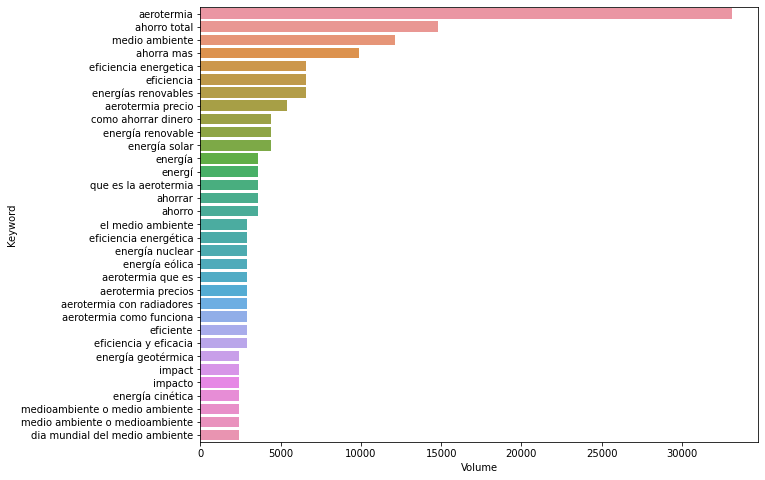

In [280]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_35, x="Volume", y="Keyword")

In [281]:
def keep_rows(df, word):
    df = df[df["Keyword"].str.contains(word)]
    return df

In [306]:
df_aerotermia = keep_rows(df, 'aerotermia')
df_aerotermia['group'] = 'aerotermia'
df_aerotermia = df_aerotermia.groupby(['group']).sum('Volume')
df_aerotermia = df_aerotermia[['Volume']]
df_aerotermia

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Volume
group,
aerotermia,164770


In [307]:
df_eficiencia = keep_rows(df, 'eficiencia')
df_eficiencia['group'] = 'eficiencia'
df_eficiencia = df_eficiencia.groupby(['group']).sum('Volume')
df_eficiencia = df_eficiencia[['Volume']]
df_eficiencia.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Volume
group,
eficiencia,139250


In [308]:
df_etiqueta = keep_rows(df, 'etiqueta')
df_etiqueta['group'] = 'etiqueta'
df_etiqueta = df_eficiencia.groupby(['group']).sum('Volume')
df_etiqueta = df_etiqueta[['Volume']]
df_etiqueta.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Volume
group,
eficiencia,139250


In [309]:
df_consumo = keep_rows(df, 'consumo')
df_consumo['group'] = 'consumo'
df_consumo = df_eficiencia.groupby(['group']).sum('Volume')
df_consumo = df_consumo[['Volume']]
df_consumo.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Volume
group,
eficiencia,139250


In [310]:
df_medioambiente = keep_rows(df, 'medio ambiente')
df_medioambiente['group'] = 'medio ambiente'
df_medioambiente = df_eficiencia.groupby(['group']).sum('Volume')
df_medioambiente = df_medioambiente[['Volume']]
df_medioambiente.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Volume
group,
eficiencia,139250
